In [11]:
import torch
from torchvision import transforms
from torch import nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from src.dataset import MNISTDataset
from src.model import Recognizer
from src.train import train_loop
from src.predict import generate_submission

import pandas as pd

In [12]:
transform = transforms.Compose([
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [13]:
train_dataset = MNISTDataset('data\\train.csv', transform=transform, is_test=False)
test_dataset = MNISTDataset('data\\test.csv', transform=transform, is_test=True)

In [14]:
print("Train Size: " + str(len(train_dataset)) + "\nTest Size: " + str(len(test_dataset)))

Train Size: 42000
Test Size: 28000


In [15]:
batch_size = 32
train_dataloader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [16]:
for X in test_dataloader:
    print(X.shape)

    break

torch.Size([32, 1, 28, 28])


In [17]:
model = Recognizer()

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

epochs = 4
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer, batch_size)
print("Done!")

Epoch 1
-------------------------------
loss: 2.266963  [   32/42000]
loss: 0.343881  [ 3232/42000]
loss: 0.655601  [ 6432/42000]
loss: 0.352631  [ 9632/42000]
loss: 0.457748  [12832/42000]
loss: 0.379387  [16032/42000]
loss: 0.412269  [19232/42000]
loss: 0.222466  [22432/42000]
loss: 0.367191  [25632/42000]
loss: 0.322098  [28832/42000]
loss: 0.346303  [32032/42000]
loss: 0.022278  [35232/42000]
loss: 0.313492  [38432/42000]
loss: 0.377038  [41632/42000]
Epoch 2
-------------------------------
loss: 0.204064  [   32/42000]
loss: 0.359589  [ 3232/42000]
loss: 0.131824  [ 6432/42000]
loss: 0.407868  [ 9632/42000]
loss: 0.324585  [12832/42000]
loss: 0.081468  [16032/42000]
loss: 0.382927  [19232/42000]
loss: 0.196256  [22432/42000]
loss: 0.236777  [25632/42000]
loss: 0.205436  [28832/42000]
loss: 0.052750  [32032/42000]
loss: 0.126170  [35232/42000]
loss: 0.050281  [38432/42000]
loss: 0.372243  [41632/42000]
Epoch 3
-------------------------------
loss: 0.100109  [   32/42000]
loss: 0.09

In [18]:
# Save the trained model
torch.save(model.state_dict(), 'model.pth')

# Generate submission
generate_submission(model, test_dataloader)

Prediction: 4


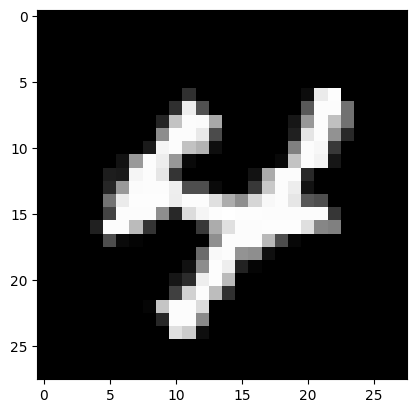

In [28]:
import random
answers = pd.read_csv('predictions/predictions5-7-2025.csv')
answers = answers['Label'].tolist()

index = random.randint(0, 1000)
img = test_dataset[index].reshape(28,28)
plt.imshow(img, cmap="gray")
print(f"Prediction: {answers[index]}")